In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
import statsmodels.tsa.arima_process as sta
import statsmodels.graphics.tsaplots as sgt


%matplotlib inline

In [4]:
df = pd.read_csv('P2training.csv',header=0)
df.tail()
Date = pd.to_datetime(df.Date)
JPY = df['JPY/USD']
dfJPY = df[['Date','JPY/USD']]
#df.rename(columns={'JPY/USD':'JPYUSD'},inplace=True)
dfJPY.Date = pd.to_datetime(dfJPY.Date)
dfJPY.set_index('Date',inplace=True, drop=True)
ldfJPY = np.log(dfJPY)
dfJPY.columns=['JPY']
dfJPY.head()

,JPY
Date,
1979-12-31,240.30
1980-01-02,238.45
1980-01-03,238.35
1980-01-04,234.80
1980-01-07,231.55


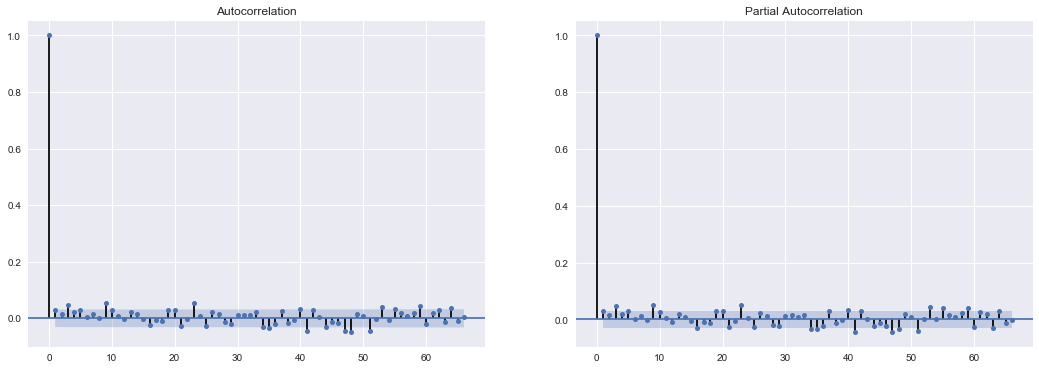

In [52]:
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 66
data = dfJPY - dfJPY.shift(1)
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(18,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

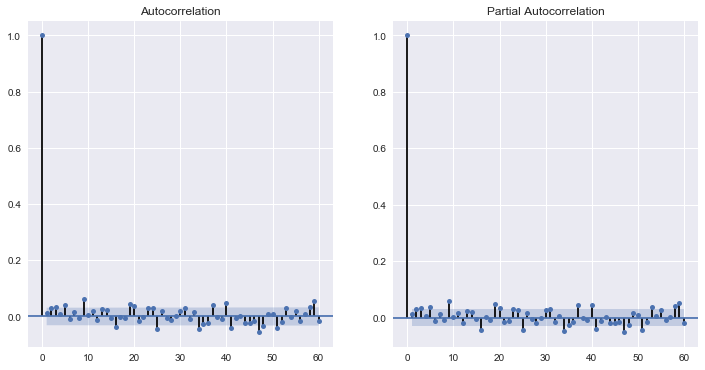

In [33]:
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 60
data = dfJPY - dfJPY.shift(1) - (dfJPY.shift(65) - dfJPY.shift(66))
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [35]:
import statsmodels.api as sm
modelrs = sm.tsa.SARIMAX(data, trend='n', order=(0,1,9), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs = modelrs.fit()
print(result_rs.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 3953
Model:             SARIMAX(0, 1, 9)x(0, 1, 1, 65)   Log Likelihood               -7310.568
Date:                            Sun, 19 Nov 2017   AIC                          14643.136
Time:                                    11:14:02   BIC                          14712.240
Sample:                                04-04-1980   HQIC                         14667.646
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9850      0.867     -1.136      0.256      -2.685       0.715
ma.L2          0.0307      0.022   

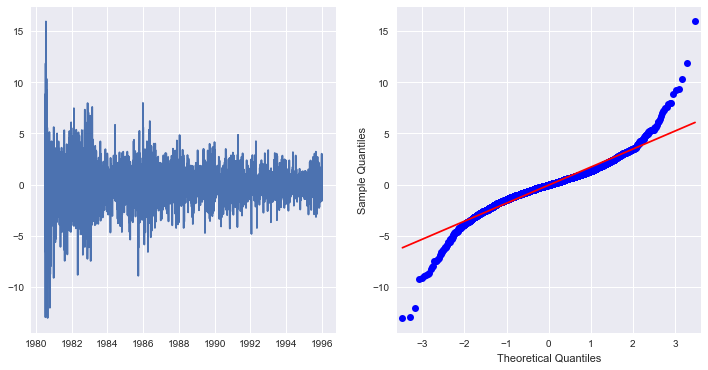

In [39]:
import scipy.stats as stats
res = result_rs.resid
res = res[66:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res)
fig = sm.qqplot(res, stats.distributions.norm, line='r', ax=ax[1]) 

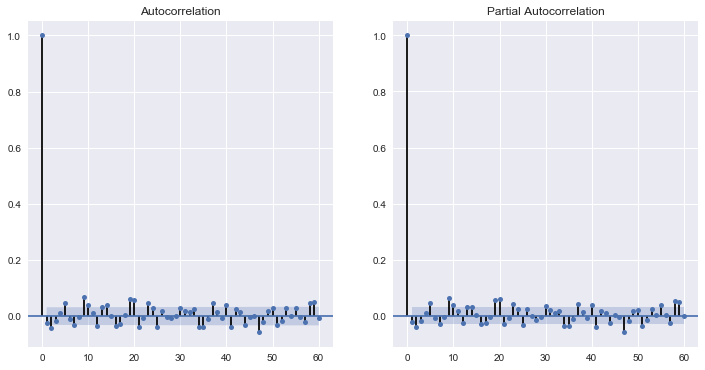

In [41]:
#residual 
alpha = 0.05
lags = 60
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(res, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(res, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [42]:
#sarima 2 
model2 = sm.tsa.SARIMAX(data, trend='n', order=(2,1,2), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs2 = model2.fit()
print(result_rs2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 3953
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 65)   Log Likelihood               -7332.391
Date:                            Sun, 19 Nov 2017   AIC                          14676.781
Time:                                    11:48:00   BIC                          14714.475
Sample:                                04-04-1980   HQIC                         14690.151
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9091      0.034    -26.724      0.000      -0.976      -0.842
ar.L2         -0.0017      0.013   

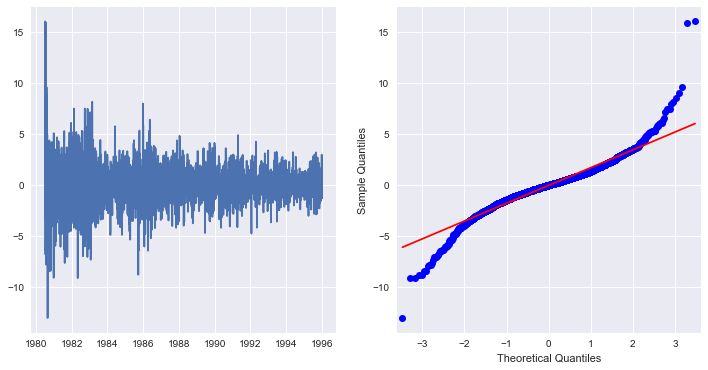

In [43]:
res2 = result_rs2.resid
res2 = res2[66:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res2)
fig = sm.qqplot(res2, stats.distributions.norm, line='r', ax=ax[1]) 

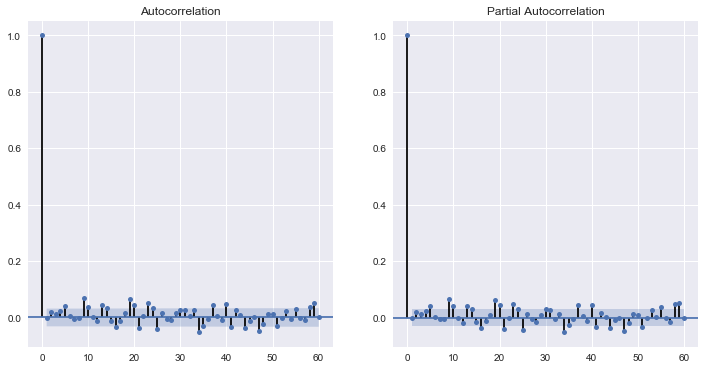

In [44]:
#residual 
alpha = 0.05
lags = 60
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(res2, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(res2, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [45]:
#AR 9

import statsmodels.api as sm
model3 = sm.tsa.SARIMAX(data, trend='n', order=(9,1,0), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs3 = model3.fit()
print(result_rs3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 3953
Model:             SARIMAX(9, 1, 0)x(0, 1, 1, 65)   Log Likelihood               -7496.558
Date:                            Sun, 19 Nov 2017   AIC                          15015.117
Time:                                    12:12:25   BIC                          15084.221
Sample:                                04-04-1980   HQIC                         15039.627
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8979      0.012    -73.025      0.000      -0.922      -0.874
ar.L2         -0.7653      0.016   

In [46]:
import statsmodels.api as sm
model3 = sm.tsa.SARIMAX(dfJPY, trend='n', order=(0,1,9), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs3 = model3.fit()
print(result_rs3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 4019
Model:             SARIMAX(0, 1, 9)x(0, 1, 1, 65)   Log Likelihood               -6087.538
Date:                            Sun, 19 Nov 2017   AIC                          12197.076
Time:                                    12:19:53   BIC                          12266.362
Sample:                                12-31-1979   HQIC                         12221.630
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0236      0.012      1.905      0.057      -0.001       0.048
ma.L2          0.0203      0.012   

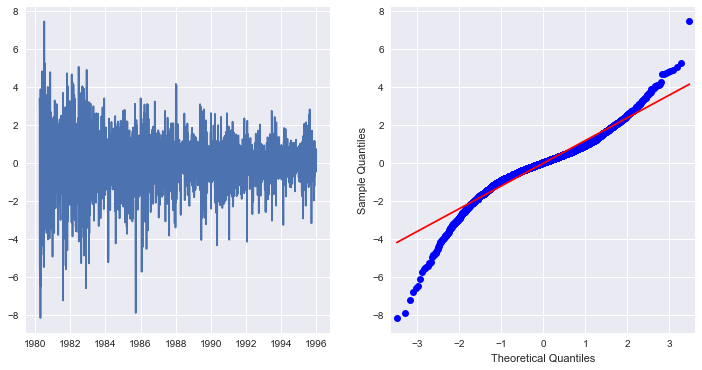

In [70]:
res3 = result_rs3.resid
res3 = res3[66:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res3)
fig = sm.qqplot(res3, stats.distributions.norm, line='r', ax=ax[1]) 

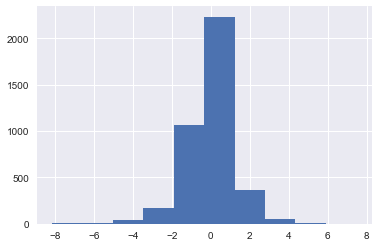

In [71]:
res3.hist()

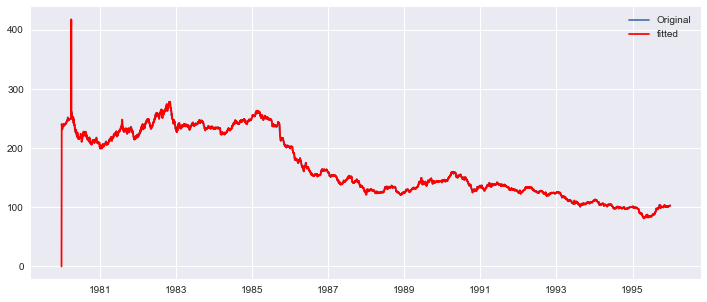

In [74]:
fitval = result_rs3.fittedvalues

fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(fitval, color='red', label='fitted')
plt.legend(loc='best')

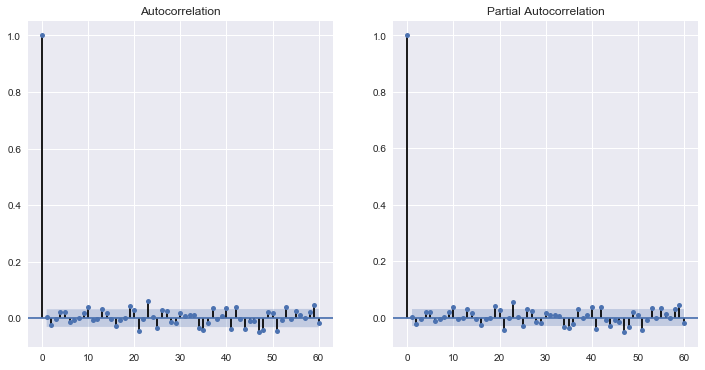

In [48]:
#residual 
alpha = 0.05
lags = 60
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(res3, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(res3, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [53]:
import statsmodels.api as sm
model4 = sm.tsa.SARIMAX(dfJPY, trend='n', order=(0,2,9), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs4 = model4.fit()
print(result_rs4.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 4019
Model:             SARIMAX(0, 2, 9)x(0, 1, 1, 65)   Log Likelihood               -6098.444
Date:                            Sun, 19 Nov 2017   AIC                          12218.889
Time:                                    12:47:07   BIC                          12288.175
Sample:                                12-31-1979   HQIC                         12243.443
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9713      0.012    -77.735      0.000      -0.996      -0.947
ma.L2         -0.0056      0.017   

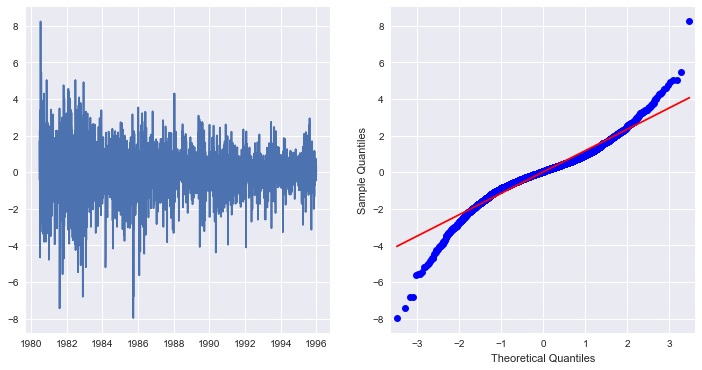

In [55]:
res3 = result_rs4.resid
res3 = res3[120:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res3)
fig = sm.qqplot(res3, stats.distributions.norm, line='r', ax=ax[1]) 

In [57]:
import statsmodels.api as sm
model5 = sm.tsa.SARIMAX(dfJPY, trend='n', order=(1,1,9), seasonal_order=(0,1,1,65),enforce_invertibility=False,enforce_stationarity=False)#,simple_differencing=True)
result_rs5 = model5.fit()
print(result_rs5.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 4019
Model:             SARIMAX(1, 1, 9)x(0, 1, 1, 65)   Log Likelihood               -6087.065
Date:                            Sun, 19 Nov 2017   AIC                          12198.129
Time:                                    14:21:54   BIC                          12273.715
Sample:                                12-31-1979   HQIC                         12224.916
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4245      0.196      2.169      0.030       0.041       0.808
ma.L1         -0.4005      0.195   

In [61]:
from statsmodels.tsa.arima_model import ARIMA

model6 = ARIMA(dfJPY, order=(1, 2, 2))  
results_ns = model6.fit(disp=-1) 
print(results_ns.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.JPY   No. Observations:                 4017
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -6276.497
Method:                       css-mle   S.D. of innovations              1.153
Date:                Sun, 19 Nov 2017   AIC                          12562.995
Time:                        15:07:58   BIC                          12594.486
Sample:                    01-03-1980   HQIC                         12574.155
                         - 12-29-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.626e-06   2.06e-05      0.128      0.898   -3.77e-05    4.29e-05
ar.L1.D2.JPY     0.9054      0.007    134.505      0.000       0.892       0.919
ma.L1.D2.JPY    -1.8758        nan        na

/Users/williammeng/anaconda/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/williammeng/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/williammeng/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/williammeng/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [66]:
import statsmodels.api as sm
model6 = sm.tsa.SARIMAX(dfJPY, trend='n', order=(9,1,0), seasonal_order=(0,1,1,65))
result_rs5 = model6.fit()
print(result_rs5.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 4019
Model:             SARIMAX(9, 1, 0)x(0, 1, 1, 65)   Log Likelihood               -6302.699
Date:                            Sun, 19 Nov 2017   AIC                          12627.397
Time:                                    15:18:35   BIC                          12696.684
Sample:                                12-31-1979   HQIC                         12651.952
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0277      0.012      2.255      0.024       0.004       0.052
ar.L2          0.0063      0.012   

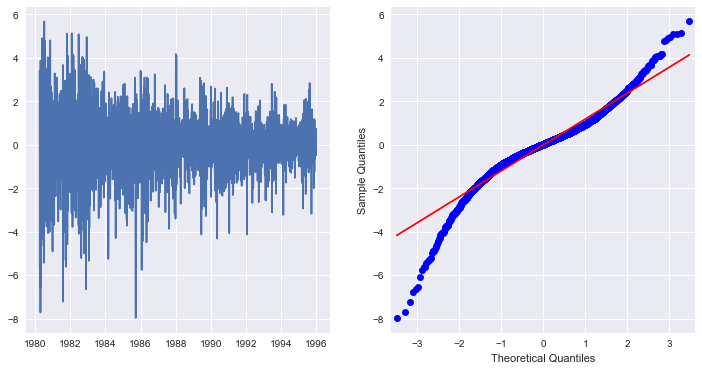

In [67]:
res3 = result_rs5.resid
res3 = res3[66:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res3)
fig = sm.qqplot(res3, stats.distributions.norm, line='r', ax=ax[1]) 

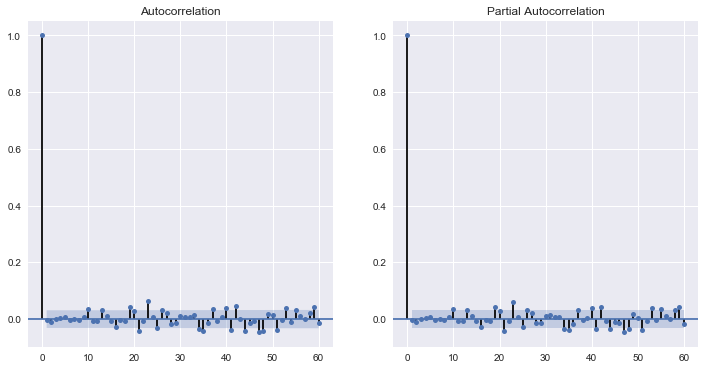

In [68]:
#residual 
alpha = 0.05
lags = 60
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(res3, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(res3, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [75]:
import statsmodels.api as sm
model6 = sm.tsa.SARIMAX(dfJPY, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
result_rs5 = model6.fit()
print(result_rs5.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                JPY   No. Observations:                 4019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6298.401
Date:                            Sun, 19 Nov 2017   AIC                          12606.803
Time:                                    17:10:56   BIC                          12638.297
Sample:                                12-31-1979   HQIC                         12617.964
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9880      0.009   -110.553      0.000      -1.006      -0.971
ma.L1          0.9933      0.007   